# Agglomerative Clustering

## Penjelasan Singkat dan Pseudo Code

Hierarchical clustering merupakan algoritma clustering yang melakukan pengelompokkan terhadap data dengan membangun tingkatan-tingkatan cluster. Salah satu tipe hierarchical clustering yang sering digunakan adalah agglomerative clustering. Pada agglomerative clustering, pendakatan yang digunakan adalah pendekatan "bottom-up", yakni dimana setiap data dianggap sebagai satu cluster yang kemudian setiap pasang data tersebut digabungkan menjadi satu cluster baru. Hal tersebut dilakukan secara berulang-ulang hingga jumlah cluster sesuai dengan jumlah cluster yang diinginkan dimana jumlah cluster akhir lebih kecil daripada jumlah cluster sebelum dilakukan clustering.

1. Menginisialisasi cluster awal dengan singleton cluster sejumlah N data. N jumlah data tersebut kemudian dihitung matriks jarak antar clusternya.
2. Mencari jarak terkecil di matriks jarak antar cluster kemudian menggabungkan kedua cluster tersebut menjadi satu cluster.
3. Memperbarui matriks jarak dengan menghitung jarak cluster baru dengan cluster-cluster lainnya.
4. Mengulangi langkah 2 dan 3 hingga seluruh objek berapa pada satu cluster yang sama

## Source Code

Mengimport library yang diperlukan, menentukan besar diagram scatter

In [91]:
from math import sqrt
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 80))

<Figure size 5760x5760 with 0 Axes>

<Figure size 5760x5760 with 0 Axes>

Fungsi euclidian, berguna dalam menghitung jarak antar objek. Pada data iris, terdapat 4 variabel yang perlu dilibatkan dalam perhitungan jarak

In [10]:
def euclidean_distance(instance1, instance2):
    return sqrt((instance1[0]-instance2[0])**2 + (instance1[1]-instance2[1])**2 + (instance1[2]-instance2[2])**2
        + (instance1[3]-instance2[3])**2)

Fungsi mean, digunakan dalam agglomerative clustering dengan average dan average group linkage

In [8]:
def mean(data):
    return float(sum(data)) / max(len(data), 1)

Fungsi make_distance_matrix, digunakan untuk menginisialisasi matriks jarak antar cluster

In [9]:
def make_distance_matrix(array):
    distance_matrix = []
    for i in range(0, len(array)):
        distance_matrix.append([])
        for j in range (0, len(array)):
            distance_matrix[i].append(euclidean_distance(array[i], array[j]))
    return distance_matrix

Memuat dataset, menginisialisasi list cluster, dan fungsi untuk menentukan jarak terkecil pada matriks jarak. Penentuan jarak terkecil dilakukan dengan mengakses matriks jarak dan kemudian memasukkan indeks dengan jarak terkecil tersebut ke list idx_min dengan idx_min[0] memiliki nilai indeks lebih kecil daripada idx_min[1]


In [92]:
### Load Datasets
iris = datasets.load_iris()
iris_distance_matrix = make_distance_matrix(iris.data)

In [12]:
def cluster_list_initiate(data_length):
    cluster_list = []
    for i in range(0,data_length):
        cluster_list.append([i])
    return cluster_list

In [43]:
def min_distance(distance_matrix):
    idx_min = []
    min_distance = distance_matrix[0][1]
    for i in range(0, len(distance_matrix)):
        for j in range(0,len(distance_matrix)):
            if i != j and distance_matrix[i][j] < min_distance :
                min_distance = distance_matrix[i][j]
                idx_min = [i,j]
    if len(idx_min) == 0:
        idx_min.append(0)
        idx_min.append(1)
        
    return idx_min

Implementasi fungsi single linkage, complete linkage, average linkage, dan average group linkage. Pada single linkage, pembaruan matriks jarak dilakukan dengan mencari jarak terkecil dari kedua cluster yang digabungkan dengan cluster lain. Pada complete linkage, pembaruan dilakukan mencari jarak terbesar. Pada average linkage, pembaruan dilakukan dengan mencari rerata jarak dari setiap anggota cluster yang digabungkan dengan anggota pada cluster lain. Terakhir, pada average group linkage, pembaruan dilakukan dengan menghitung jarak rerata dari kedua cluster yang digabungkan dengan cluster lain.

Pada setiap algoritma linkage tersebut, dibutuhkan parameter idx_min atau indeks 2 cluster yang memiliki jarak terkecil pada matriks jarak. Berbeda dengan ketiga linkage lainnya, average linkage membutuhkan parameter list cluster karena linkage tersebut perlu mengakses matriks jarak awal antar data yang digunakan untuk melakukan pembaruan jarak.

In [14]:
def single_link_update_matrix(distance_matrix, idx_min):
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with single linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:
                update_distance_matrix[i][idx_min[0]] = min(distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]])
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
    
    return update_distance_matrix

In [15]:
def complete_link_update_matrix(distance_matrix, idx_min):
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with complete linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:
                update_distance_matrix[i][idx_min[0]] = max(distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]])
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
                
    return update_distance_matrix

In [31]:
def average_link_update_matrix(distance_matrix, cluster_list, idx_min):
    
    n_matrix = len(distance_matrix)
    
    mean_list = []
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with average group linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:
                for k in range(0, len(cluster_list[idx_min[0]])):
                    for l in range (0, len(cluster_list[idx_min[1]])):
                        mean_list.append(iris_distance_matrix[k][l])
                update_distance_matrix[i][idx_min[0]] = mean(mean_list)
                mean_list = []
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
                
    return update_distance_matrix

In [24]:
def average_group_link_update_matrix(distance_matrix, idx_min):
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with average linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:             
                update_distance_matrix[i][idx_min[0]] = mean([distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]]])                    
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]
                
    return update_distance_matrix

Pengimplementasian fungsi merge_cluster memiliki 4 parameter input yaitu, matriks jarak, list cluster, jenis linkage, dan idx_min. Pertama, fungsi ini akan menginisialisasi pembaruan matriks jarak. Kemudian, bergantung kepada jenis linkage, pembaruan matriks jarak pun dilakukan. Setelah itu, dilakukan penghapusan baris dan kolom dengan indeks yang memiliki jarak terkecil, atau indeks yang terdapat pada idx_min. Setelah penghapusan, dilakukan pembaruan jarak pada baris dan kolom cluster yang digabungkan. Fungsi ini mengembalikan pembaruan matriks jarak dan list cluster.

In [44]:
def merge_cluster(distance_matrix,cluster_list,linkage,idx_min):
    result = []
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    if linkage == "single":
        update_distance_matrix = single_link_update_matrix(distance_matrix, idx_min)
    if linkage == "complete":
        update_distance_matrix = complete_link_update_matrix(distance_matrix, idx_min)
    if linkage == "average_group":
        update_distance_matrix = average_group_link_update_matrix(distance_matrix, idx_min)
    if linkage == "average":
        update_distance_matrix = average_link_update_matrix(distance_matrix, cluster_list, idx_min)
        
    # Delete 2nd merged row and column
    for i in range(0, n_matrix):
        # Delete column
        update_distance_matrix[i].pop(idx_min[1])
    
    # Delete row
    update_distance_matrix.pop(idx_min[1])
    
    # Update merged 1st row
    n_matrix = len(update_distance_matrix)
    for i in range(0, n_matrix):
        if i != idx_min[0]:
            update_distance_matrix[idx_min[0]][i] = update_distance_matrix[i][idx_min[0]]
    
    result.append(update_distance_matrix)
    
    # Update Cluster List
    for i in range (0, len(cluster_list[idx_min[1]])):
        cluster_list[idx_min[0]].append(cluster_list[idx_min[1]][i])
    cluster_list.pop(idx_min[1])
    
    result.append(cluster_list)
    
    return result

Fungsi AGGLO_predict memiliki 3 parameter, yaitu data, linkage, dan jumlah cluster. Pada fungsi ini, hal pertama yang dilakukan adalah menginisialisasi matriks jarak dan list cluster. List cluster diinisialisasi dengan daftar singleton cluster sejumlah N data. Setelah itu, akan dilakukan iterasi sebanyak jumlah data dikurang jumlah cluster kali. Iterasi dilakukan sebanyak itu agar hasil akhir mendapatkan sebanyak jumlah cluster yang diinginkan bukan satu cluster besar. Di dalam iterasi, dilakukan assignment nilai idx_min, list cluster, dan matriks jarak. Fungsi ini mengembalikan list cluster.

Fungsi AGGLO_labels memiliki 2 parameter, yaitu data dan list cluster. Fungsi ini berperan dalam menentukan label pada setiap cluster. 

Fungsi calculate_accuracy berperan dalam menghitung banyaknya jumlah hasil predict yang sama dengan data target. Setelah itu, dilakukan perhitungan rasio jumlah hasil predict yang benar atau sama dengan data target dengan keseluruhan data.

In [45]:
def AGGLO_predict(data, linkage, n_cluster):
    distance_matrix = make_distance_matrix(data)
    cluster_list = cluster_list_initiate(len(data))
    
    for i in range (0, len(distance_matrix)-n_cluster):
        idx_min = min_distance(distance_matrix)
        result = merge_cluster(distance_matrix,cluster_list,affinity,idx_min)
        cluster_list = result[1]
        distance_matrix = result[0]
        
    return cluster_list

In [60]:
def AGGLO_labels(data, cluster_list):
    labels = []
    
    n_matrix = len(data)
    
    for i in range (0, n_matrix):
        labels.append(-1)
        
    for i in range (0, len(cluster_list)):
        for j in range (0, len(cluster_list[i])):
            labels[cluster_list[i][j]] = i
    
    return labels

In [65]:
def calculateAccuracy(predictions, actual_targets):
    right_counts = 0
    for i in range(0,len(predictions)):
        if (predictions[i] == actual_targets[i]):
            right_counts += 1
    return (right_counts/len(predictions))

## Clustering pada Dataset Iris

Pada agglomerative clustering dengan data iris menggunakan 
    

1. single linkage didapat akurasi sebesar 0.68
2. complete linkage didapat akurasi sebesar 0.84 dengan melakukan pertukaran label predict pada cluster 1 dan 2
3. average linkage didapat akurasi sebesar 0.34
4. average group linkage didapat akurasi sebesar 0.9

Berdasarkan hasil tersebut, dapat disimpulkan bahwa clustering dengan average group linkage memberikan akurasi terbaik.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


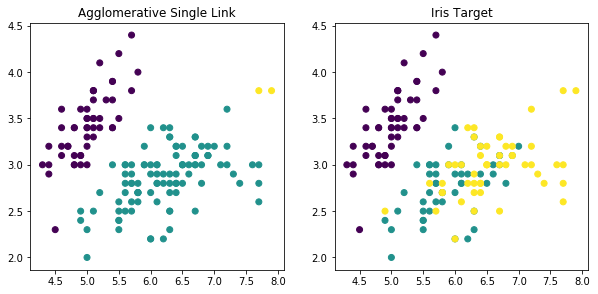

Accuracy :  0.68


In [83]:
labels_single = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'single', 3))
labels_single = np.choose(labels_single, [0,1,2])
print(labels_single)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_single)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Single Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_single, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


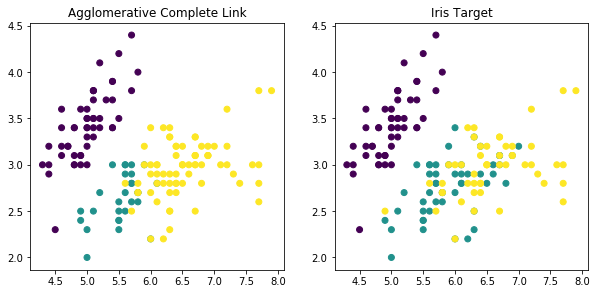

Accuracy :  0.84


In [85]:
labels_complete = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'complete', 3))
labels_complete = np.choose(labels_complete, [0,2,1])
print(labels_complete)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_complete)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Complete Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_complete, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


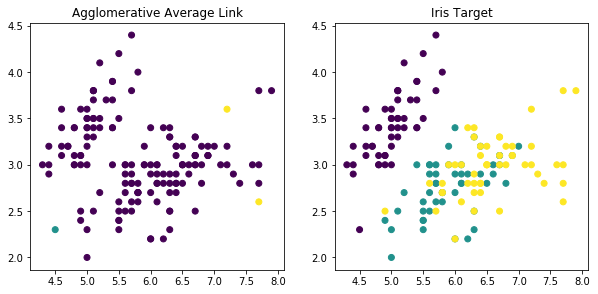

Accuracy :  0.34


In [88]:
labels_average = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'average', 3))
labels_average = np.choose(labels_average, [0,1,2])
print(labels_average)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_average)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Average Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_average, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


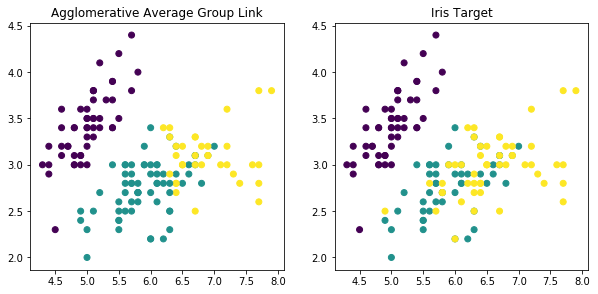

Accuracy :  0.9


In [89]:
labels_average_group = AGGLO_labels(iris.data, AGGLO_predict(iris.data,'average_group', 3))
labels_average_group = np.choose(labels_average_group, [0,1,2])
print(labels_average_group)

###Plot the Agglomerative Single Link Prediction
plt.subplot(221)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels_average_group)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Agglomerative Average Group Link")

###Plot the Actual Label Target
plt.subplot(222)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Iris Target")
plt.show()

print("Accuracy : ", calculateAccuracy(labels_average_group, iris.target))